# Introduction
This notebook's main purpose is to work on a complete Classification project on the famous MNIST dataset. We will go through the following checkpoints:

1. Big picture
2. Loading data
3. EDA (Visualization)
4. Prepare data for ML 
5. Model Selection
6. Tuning Model
7. Present solution

## 1. Big Picture
The MNIST dataset is a set of 70,000 small images of handwritten digits.

In [1]:
# import libraries
import numpy as np
import pandas as pd

# plotting libraries
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Ignore useless warnings 
import warnings
warnings.filterwarnings(action="ignore")


## 2. Loading Data

In [2]:
# the dataset is from sklearns own ml library
from sklearn.datasets import fetch_openml
df = fetch_openml('mnist_784', version=1)
df.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
# lets take out the data and target columns
X, y = df['data'], df['target']
X.shape

# There are 70,000 images with each having 784 features

(70000, 784)

In [4]:
y.shape # shapes is correct

(70000,)

In [5]:
# recall the 784 features, we know that the photo should be sqrt of this
np.sqrt(784)

# hence the dimension of our image is 28*28

28.0

## 3. Vizualizing Data

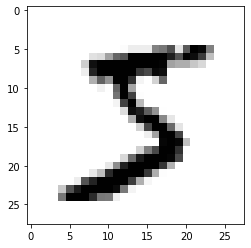

In [6]:
# Lets take a look at our data
image = X[0]
image = image.reshape(28, 28)
plt.imshow(image, cmap=mpl.cm.binary) 
plt.show()

In [7]:
# image looks like a 5, lets check if target is 5
y[0]

'5'

## 4. Prepareing Data for ML
Great now lets create a test set before we do anything else with the data

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
X_train.shape

(60000, 784)

## 5. Model Selection Strategies
 - Binary
 - Multiclass
 - Multilabel
 - multioutput
 
 ###  Binary Classification

In [10]:
# Lets try predicting all the 7's in the dataset first
y_train_7 = (y_train == '7')
y_test_7 = (y_test == '7')
y_train_7.shape

(60000,)

In [11]:
# import our SGDClassifier from sklearn 
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state =42)
sgd.fit(X_train, y_train_7)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

### Measuring Binary Classification Accutacy with Cross-Validation

In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd, X_train, y_train_7, cv=3, scoring='accuracy')

array([0.97885106, 0.97885   , 0.97549877])

The accuracy of a 3-fold cross-validation says we have above 97% accuracy. But this is not the case and here's why:

**Note: the dataset contains 10 percent of 7's if distributed evenly. Therefore if we predict al False we would be getting roughly 90% accuracy.**

Accuracy is a bad measurement in this case. Lets use a **Confusion Matrix**

In [13]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(sgd, X_train, y_train_7, cv=3)
cm = confusion_matrix(y_train_7, predictions)
cm

array([[53129,   606],
       [  730,  5535]], dtype=int64)

In [14]:
# lets check our precision and recall score
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_7, predictions)


0.9013190034196384

In [15]:
recall_score(y_train_7, predictions)

0.8834796488427773

**Takeaways**

 - we predict 90% of 7's correctly
 - we only identified 88% of the 7's
 - Guess its not bad as we thought it might, maybe its becuase no other number looks like 7 we can try predicting some other number like 3 or 5 too see if this model works well.

### Multiclass Classification
we will use the **Support Vector Classifier**

In [16]:
from sklearn.svm import SVC
image_five = X[0]

svm = SVC(gamma="auto", random_state=42)
svm.fit(X_train[:1000], y_train[:1000]) 
svm.predict([image_five])

array(['5'], dtype=object)

In [17]:
image_scores = svm.decision_function([image_five])
image_scores

# this shows an array of probabilities. the higher the percantage
# the higher it is that corresponding y value

array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

In [18]:
# get the index of largest percentage from scores
np.argmax(image_scores)

5

In [19]:
# this shows the classes in our model
svm.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [20]:
# what number does it predict?
svm.classes_[5]

# it predicts it's 5 so its correct

'5'

### KNN  Classifier or Multioutput Classifier

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

In [22]:
y_knn_pred = knn.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.9714